# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф.

Необходимо построить модель с максимально большим значением *accuracy*, не менее 0.75.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
import seaborn as sns
from sklearn.dummy import DummyClassifier

## Изучение файла

In [4]:
df = pd.read_csv("C://Users//smirn//Downloads//Практикум//проекты//Введение в машинное обучение//users_behavior.csv")
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Пропусков нет.

In [6]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


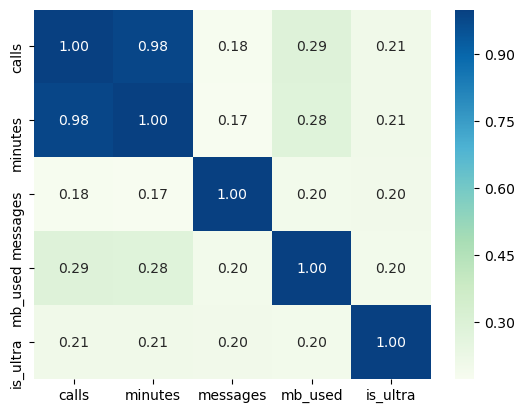

In [10]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='GnBu');

Видим, что признаки "calls" и "minutes" очень сильно коррелируют. Поэтому удалим один из признаков.

In [11]:
df = df.drop('calls', axis=1)
df

,minutes,messages,mb_used,is_ultra
0,311.90,83.0,19915.42,0
1,516.75,56.0,22696.96,0
2,467.66,86.0,21060.45,0
3,745.53,81.0,8437.39,1
4,418.74,1.0,14502.75,0
...,...,...,...,...
3209,910.98,20.0,35124.90,1
3210,190.36,0.0,3275.61,0
3211,634.44,70.0,13974.06,0
3212,462.32,90.0,31239.78,0


## Разбиение данных на выборки

In [12]:
df_train, df_valid_test = train_test_split(df, test_size=0.4, random_state=12345)
print(df_valid_test.shape)
print(df_train.shape)

(1286, 4)
(1928, 4)


In [13]:
df_valid, df_test = train_test_split(df_valid_test, test_size=0.5, random_state=12345)
print(df_valid.shape)
print(df_test.shape)

(643, 4)
(643, 4)


Разбили данные на выборки в пропорции 3:1:1 (60% - обучающая, 20% - валидационная и 20% - тестовая)

## Исследование модели

In [21]:
features_train = df_train.drop('is_ultra', axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop('is_ultra', axis=1)
target_valid = df_valid['is_ultra']

best_model_tree = None
best_accuracy = 0

for i in range(1,6):
    model = DecisionTreeClassifier(max_depth = i, random_state=12345)
    model.fit(features_train, target_train)
    answers = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, answers)
    print('max_depth =', i, ':', accuracy)
    if accuracy > best_accuracy:
        best_model_tree = model
        best_accuracy = accuracy
print('Best model:', best_model_tree)

max_depth = 1 : 0.7542768273716952
max_depth = 2 : 0.7822706065318819
max_depth = 3 : 0.7853810264385692
max_depth = 4 : 0.7884914463452566
max_depth = 5 : 0.7884914463452566
Best model: DecisionTreeClassifier(max_depth=4, random_state=12345)


Исследовали модели дерева решений с разными значениями максимальной глубины. Лучший результат показала модель с максимальной глубиной равной 4.

In [15]:
best_model_forest = None
best_result = 0
est = 0
for est in range(1,11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result:
            best_result = result
            best_model_forest = model
            est = est
            
print("Accuracy наилучшей модели на валидационной выборке:", best_result)
print("Количество оценщиков наилучшей модели:", est)

Accuracy наилучшей модели на валидационной выборке: 0.7589424572317263
Количество оценщиков наилучшей модели: 10


Исследовали модель случайного леса с разным количеством оценщиков. Лучший результат с наибольшим количеством оценщиков. Точность получилась хуже, чем у дерева решений с максимальной глубиной 4.

In [16]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model.fit(features_train, target_train)
answers = model.predict(features_valid)
accuracy = accuracy_score(target_valid, answers)
print('Accuracy =', accuracy)

Accuracy = 0.7558320373250389


Исследовали модель логистической регрессии. Результат оказался хуже.

## Проверка модели на тестовой выборке

In [22]:
features_test = df_test.drop('is_ultra', axis=1)
target_test = df_test['is_ultra']

accuracy_bmt_test = best_model_tree.score(features_test, target_test)

print('Accuracy наилучшей модели дерева решений:', accuracy_bmt_test)

Accuracy наилучшей модели дерева решений: 0.7807153965785381


Проверил модели дерева решений на тестовой выборке.

## Проверка модели на адекватность

In [32]:
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(features_train_valid, target_train_valid)

dummy_accuracy = dummy_model.score(features_test, target_test)

print('Точность фиктивной модели:', dummy_accuracy)

Точность случайной модели: 0.6842923794712286


Для фиктивной модели точность оказалась ниже.

## Вывод

Имелись данные о поведение клиентов, уже выбравших тариф. Необходимо было построить модель, которая верно бы классифицировала пользователя.    
Я изучил данные, разбил их на выборки и обучил несколько моделей с перебором гиперпараметров.    
Наилучший результат дала модель дерева решений с максимальной глубиной 4.    
На тестовой выборке получили точность равную 0,78.    
Фиктивная модель, выдающая самый частый ответ, оказалась менее точной.